### 1. Import Libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Get dataset

- ###   a. Bike sharing

In [71]:
df = pd.read_csv("bike-sharing.csv")

In [73]:
np.abs(df.corr()["cnt"]).sort_values(ascending = False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

In [74]:
df = df[["registered","cnt"]]

In [75]:
df.head()

,registered,cnt
0,13,16
1,32,40
2,27,32
3,10,13
4,1,1


In [76]:
df.isnull().sum()

registered    0
cnt           0
dtype: int64

- ###   b. student_clustering

In [41]:
data = pd.read_csv("student_clustering.csv")

In [42]:
data.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [43]:
# Checking for missing values
data.isnull().sum()

cgpa    0
iq      0
dtype: int64

In [44]:
data.shape

(200, 2)

### 3.  Visualize

C:\Users\SREEMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa', ylabel='iq'>

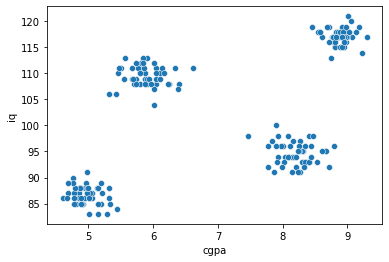

In [48]:
sns.scatterplot(data.iloc[:,0],data.iloc[:,1])

C:\Users\SREEMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='registered', ylabel='cnt'>

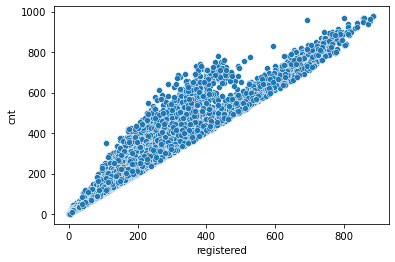

In [77]:
sns.scatterplot(df.iloc[:,0],df.iloc[:,1])

### 4.  K-Means

In [50]:
from sklearn.cluster import KMeans

In [78]:
def elbow_graph(X,k_range = 11):
    wcss = []
    K = range(1,k_range)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(K,wcss)

### 4.a On (student dataset)

C:\Users\SREEMAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


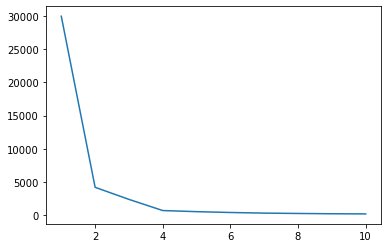

In [79]:
elbow_graph(data)

In [68]:
kmeans_f = KMeans(n_clusters=4)
y_means = kmeans_f.fit_predict(data)

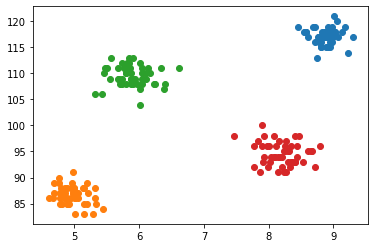

In [69]:
# plot
plt.scatter(data.iloc[y_means == 0,0], data.iloc[y_means == 0,1])
plt.scatter(data.iloc[y_means == 1,0], data.iloc[y_means == 1,1])
plt.scatter(data.iloc[y_means == 2,0], data.iloc[y_means == 2,1])
plt.scatter(data.iloc[y_means == 3,0], data.iloc[y_means == 3,1])

### 4.b On (Bike sharing dataset)

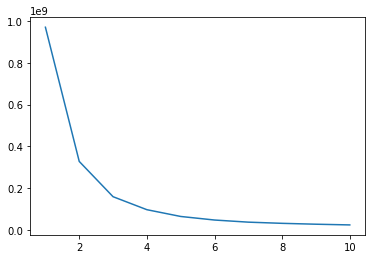

In [80]:
elbow_graph(df)

In [81]:
kmeans_f2 = KMeans(n_clusters=5)
y_means2 = kmeans_f2.fit_predict(df)

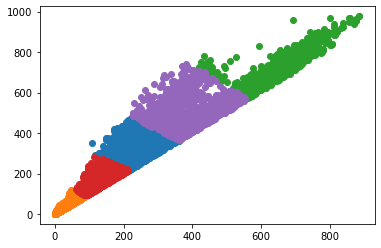

In [82]:
# plot
plt.scatter(df.iloc[y_means2 == 0,0], df.iloc[y_means2 == 0,1])
plt.scatter(df.iloc[y_means2 == 1,0], df.iloc[y_means2 == 1,1])
plt.scatter(df.iloc[y_means2 == 2,0], df.iloc[y_means2 == 2,1])
plt.scatter(df.iloc[y_means2 == 3,0], df.iloc[y_means2 == 3,1])
plt.scatter(df.iloc[y_means2 == 4,0], df.iloc[y_means2 == 4,1])